<a href="https://colab.research.google.com/github/grmanjar-cmyk/Baseball_projects/blob/main/whiff_rate_v_vert_horiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving 2025_whiff_vert_hor.csv to 2025_whiff_vert_hor.csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [16]:
pd.read_csv('2025_whiff_vert_hor.csv')
df = pd.read_csv('2025_whiff_vert_hor.csv')
df.head()
df.columns

Index(['last_name, first_name', 'player_id', 'year', 'whiff_percent',
       'fastball_avg_break_x', 'fastball_avg_break_z_induced'],
      dtype='object')

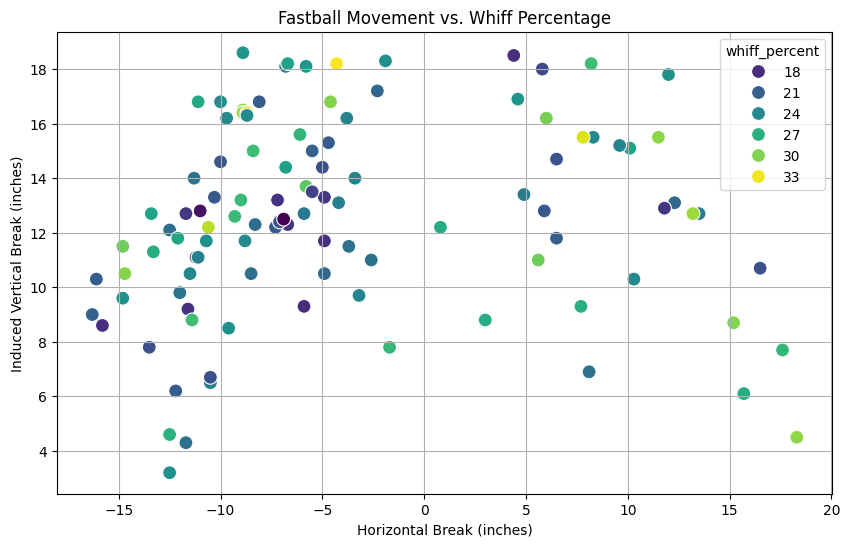

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fastball_avg_break_x', y='fastball_avg_break_z_induced', hue='whiff_percent', palette='viridis', s=100)
plt.title('Fastball Movement vs. Whiff Percentage')
plt.xlabel('Horizontal Break (inches)')
plt.ylabel('Induced Vertical Break (inches)')
plt.grid(True)
plt.show()

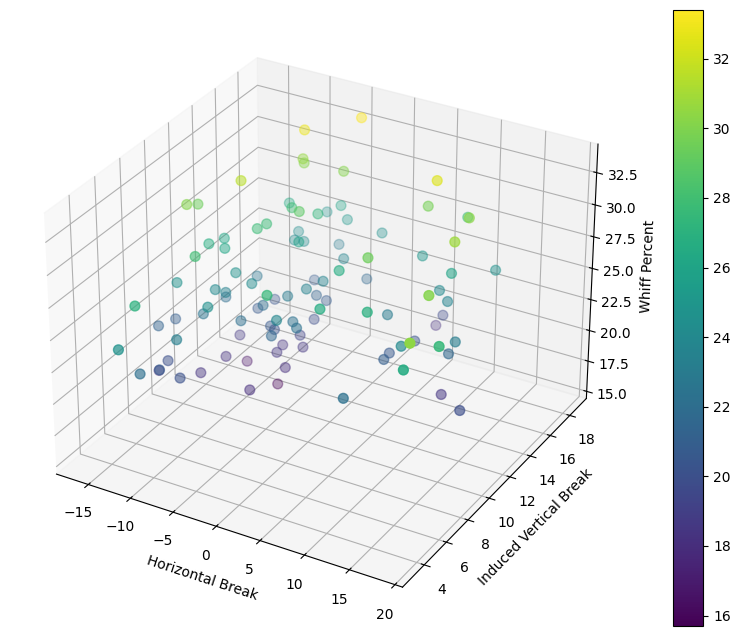

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(df['fastball_avg_break_x'], df['fastball_avg_break_z_induced'], df['whiff_percent'], c=df['whiff_percent'], cmap='viridis', s=50)
ax.set_xlabel('Horizontal Break')
ax.set_ylabel('Induced Vertical Break')
ax.set_zlabel('Whiff Percent')
fig.colorbar(p)
plt.show()

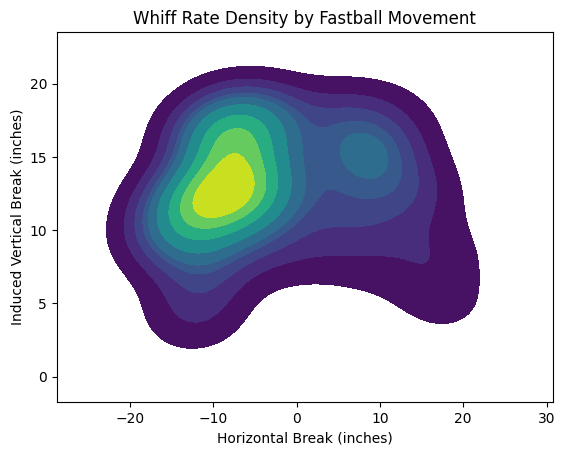

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=df,
    x='fastball_avg_break_x',
    y='fastball_avg_break_z_induced',
    weights='whiff_percent',
    fill=True,
    cmap="viridis"
)
plt.title('Whiff Rate Density by Fastball Movement')
plt.xlabel('Horizontal Break (inches)')
plt.ylabel('Induced Vertical Break (inches)')
plt.show()

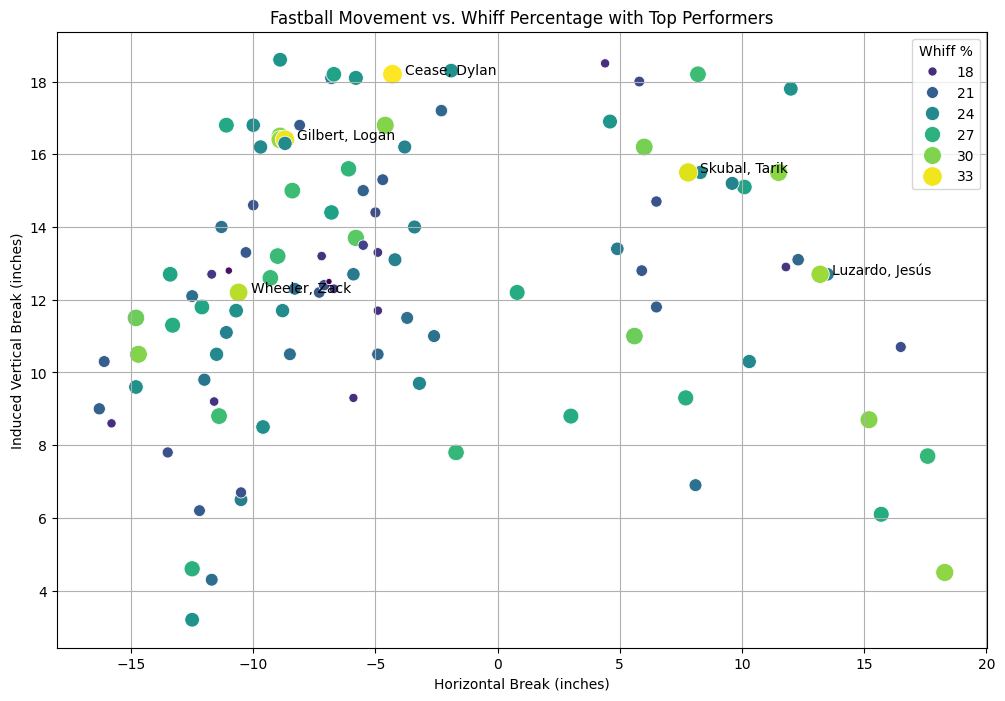

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by whiff_percent to easily identify the top pitchers
df_sorted = df.sort_values(by='whiff_percent', ascending=False)

# --- Create the Scatter Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='fastball_avg_break_x', y='fastball_avg_break_z_induced', hue='whiff_percent', size='whiff_percent', sizes=(20, 200), palette='viridis')

# --- Annotate the top 5 pitchers ---
# We now directly access the column with the full name.
for i in range(5):
    plt.text(df_sorted.iloc[i]['fastball_avg_break_x'] + 0.5,
             df_sorted.iloc[i]['fastball_avg_break_z_induced'],
             df_sorted.iloc[i]['last_name, first_name']) # <-- This is the only line that changes

# --- Final Touches ---
plt.title('Fastball Movement vs. Whiff Percentage with Top Performers')
plt.xlabel('Horizontal Break (inches)')
plt.ylabel('Induced Vertical Break (inches)')
plt.grid(True)
plt.legend(title='Whiff %')
plt.show()

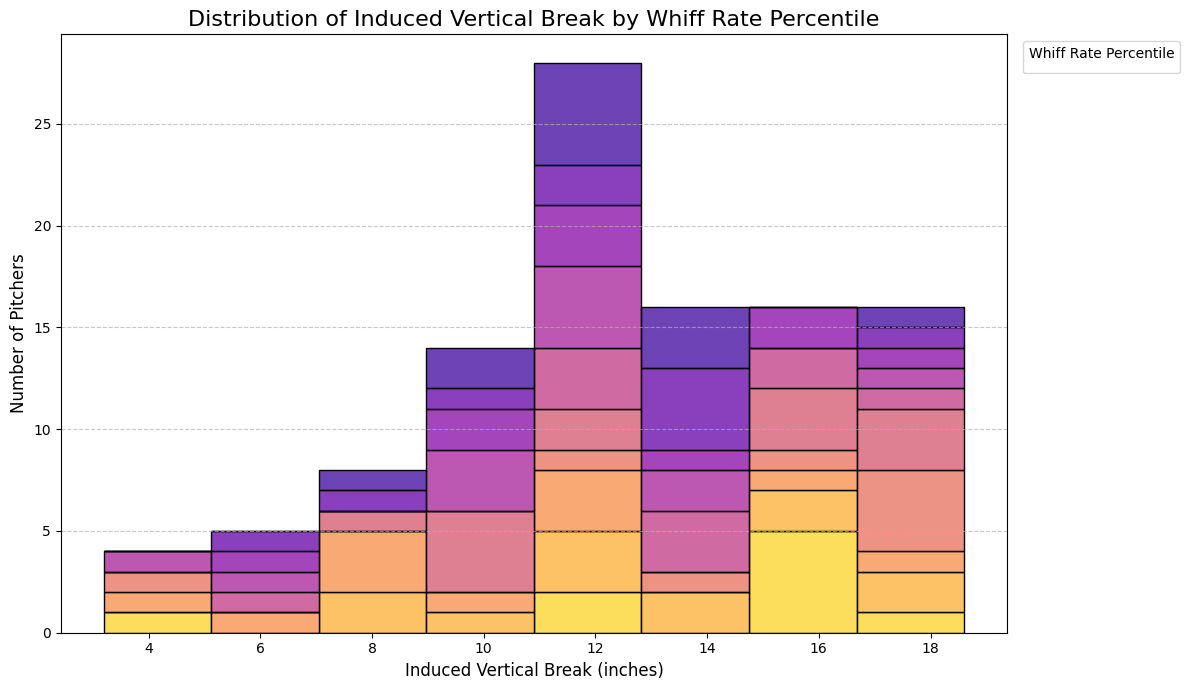

In [27]:
# --- Step 1: Create the percentile labels and binned column (no changes) ---
percentile_labels = [f'{i}-{i+10}th Percentile' for i in range(0, 100, 10)]
df['whiff_percentile_range'] = pd.qcut(df['whiff_percent'],
                                      q=10,
                                      labels=percentile_labels)

# --- Step 2: Create the histogram plot (no changes) ---
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=df,
                  x='fastball_avg_break_z_induced',
                  hue='whiff_percentile_range',
                  multiple='stack',
                  palette='plasma'
                 )

# --- Final Touches (no changes) ---
ax.set_title('Distribution of Induced Vertical Break by Whiff Rate Percentile', fontsize=16)
ax.set_xlabel('Induced Vertical Break (inches)', fontsize=12)
ax.set_ylabel('Number of Pitchers', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# -Convert reversed() iterators to lists ---
handles, labels = ax.get_legend_handles_labels()
ax.legend(list(reversed(handles)), list(reversed(labels)), # <-- Wrapped with list()
          title='Whiff Rate Percentile',
          bbox_to_anchor=(1.01, 1),
          loc='upper left')

plt.tight_layout()
plt.show()




In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

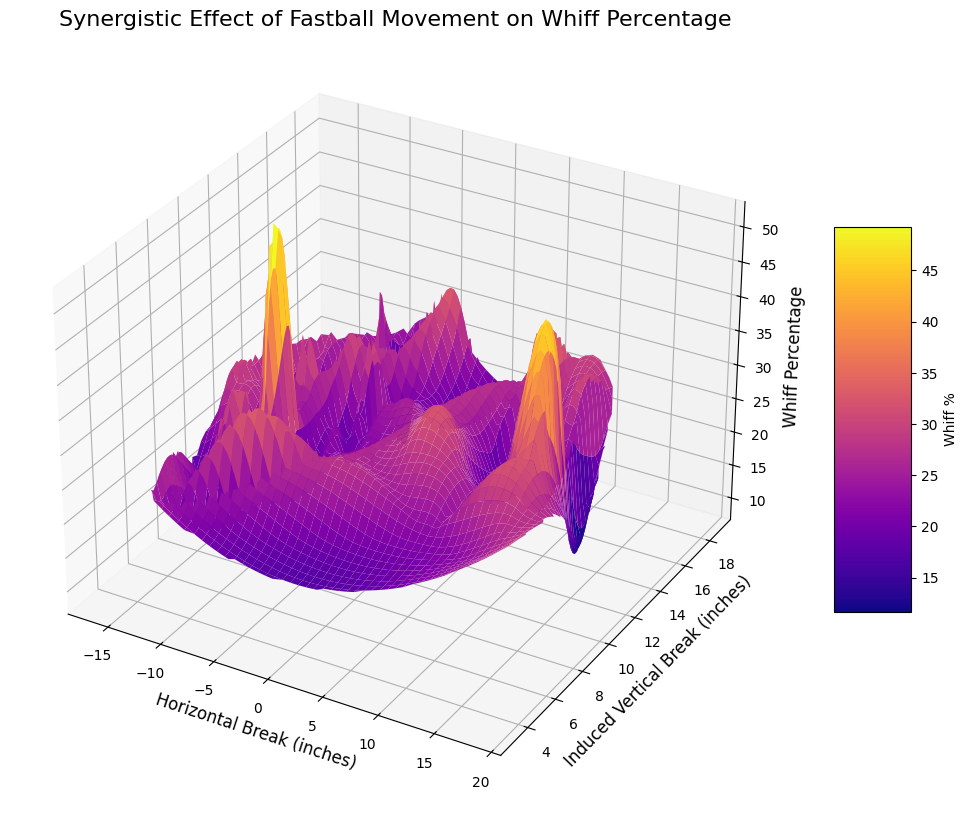

In [31]:

# --- Step 1: Prepare the data points from your DataFrame ---
x = df['fastball_avg_break_x']
y = df['fastball_avg_break_z_induced']
z = df['whiff_percent']

# --- Step 2: Create a regular grid to interpolate onto ---
# We create a grid of 100x100 points to build our surface on.
grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]

# --- Step 3: Interpolate the Z values (whiff_percent) onto the grid ---
# This is the key step. It "fills in the blanks" between your actual data points.
# 'cubic' interpolation creates a nice, smooth surface.
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# --- Step 4: Create the 3D Surface Plot ---
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the interpolated grid data.
# The 'cmap' argument sets the color map, just like in the histogram.
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='plasma', edgecolor='none')

# --- Final Touches ---
ax.set_title('Synergistic Effect of Fastball Movement on Whiff Percentage', fontsize=16)
ax.set_xlabel('Horizontal Break (inches)', fontsize=12)
ax.set_ylabel('Induced Vertical Break (inches)', fontsize=12)
ax.set_zlabel('Whiff Percentage', fontsize=12)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, label='Whiff %')

# You may need to rotate the plot to get the best view
# ax.view_init(elev=20, azim=-65) # Experiment with these values (elevation and azimuth)

plt.show()

In [32]:
import plotly.express as px

In [34]:
# --- Create the Interactive 3D Scatter Plot (no changes here) ---
fig = px.scatter_3d(df,
                    x='fastball_avg_break_x',
                    y='fastball_avg_break_z_induced',
                    z='whiff_percent',
                    color='whiff_percent',
                    hover_name='last_name, first_name',
                    size='whiff_percent',
                    color_continuous_scale='plasma'
                   )

# --- Customize the Layout and Appearance ---
# THE FIX IS HERE: We are adding width and height.
fig.update_layout(
    title='Interactive 3D View of Fastball Movement vs. Whiff %',
    width=900,   # <-- ADD THIS LINE to set the width in pixels
    height=750,  # <-- ADD THIS LINE to set the height in pixels
    scene=dict(
        xaxis_title='Horizontal Break (inches)',
        yaxis_title='Induced Vertical Break (inches)',
        zaxis_title='Whiff Percentage'
    ),
    margin=dict(r=20, b=10, l=10, t=40)
)

# --- Show the Plot ---
fig.show()